In [1]:
import os
import numpy as np
import pickle
import datetime
import pandas as pd
from scipy import stats, special
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing


## Loading Model and Preprocessed Test Data

In [5]:
data_dir = 'input_data'
data_file = 'test_pca.csv'
model_dir = 'models'
pred_dir = 'predictions'
model_name = 'GBR_model_07_10_20'
seed=0

In [3]:
# Loading trained model
loaded_model = pickle.load(open(os.path.join(model_dir, model_name), 'rb'))

In [6]:
# Loading in processed test dataset
X_test = pd.read_csv(os.path.join(data_dir, data_file), index_col='ID')

## Making Predictions on Test Data

In [7]:
predictions = loaded_model.predict(X_test)

Inverting the Box-Cox transformation on the predictions using the original lambda derived from training data, for comparison to the true target values

In [8]:
predictions = special.inv_boxcox(predictions.reshape(-1, 1), stats.boxcox(pd.read_csv(os.path.join(data_dir, 'train.csv'), usecols=['target', 'ID'], index_col='ID')['target'])[1])

In [9]:
predictions = [x[0] for x in predictions]

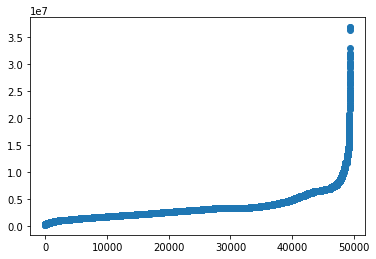

In [10]:
plt.scatter(range(len(predictions)), np.sort(predictions))

Well.... thats not great. 

Saving predictions for submission

In [11]:
time = datetime.datetime.now().strftime("%D").replace('/', '_')

#Creating prediction directory
if not os.path.exists(pred_dir):
    os.makedirs(pred_dir)

submission = pd.Series(predictions, X_test.index, name='target')
    
pred_file = 'predictions_{}.csv'.format(time)
submission.to_csv(os.path.join(pred_dir, pred_file))